# **Homework 1: Linear Regression and Gradient Descent**

**Total Points**: 10

**Objective**:
In this homework, you will implement linear regression using multiple methods, including the closed-form solution - normal equation and gradient descent. You will also explore the relationship between learning rate and convergence, and visualize the results.


### **Submission Instructions**
- submit .ipynb file via Canvas (Not email), you should not submit .py file.
- Make sure to comment your code and explain your logic wherever necessary.
- Follow the instructions and fill in the required code blocks.




### **Learning Outcomes**
By the end of this assignment, you will:
- Understand how to implement linear regression from scratch.
- Differentiate between the closed-form solution and gradient descent.
- Analyze its performance.

### **Important Note**:
You can open this notebook in Google Colab using a Gmail account. To code, first, go to 'File' → 'Save a copy in Drive'. This will allow you to edit the file on your own Drive.

# Setup (*Do Not change*)

In [68]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42) ## Ensures reproducibility

#prepare the dataset (*Do Not change*)

In [50]:
X = 2 * np.random.rand(100,1)
#print()
y = 4 + 3 * X + np.random.randn(100, 1)

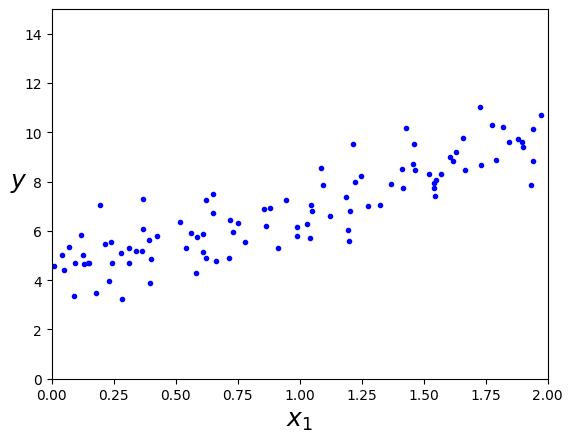

In [51]:
#visualize the dataset
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

#**1st way**: Linear regression using sklearn library (*Do Not change*)

In [52]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [53]:
#make predictions on X_new
X_new = np.array([[0], [2]])
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

#**2nd way**: Linear regression using normal equation (*Your turn!!!*)

# 1. add x0 = 1 to each instance (1 point)

In [54]:
#add the bias term (x0 = 1) to each instance!
#your code
X_b = np.c_[np.ones((100,1)), X]

# 2. write the closed-form solution, normal equation using np.linalg.inv() (2 points)

In [55]:
#closed-form solution: w = (X^T X)^{-1} X^T y
#np.linalg.inv(...): This computes the inverse of the matrix  (X^T X)^{-1}
#your code

thetaBest = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

print(thetaBest)

[[4.21509616]
 [2.77011339]]


# 3. print weights

In [56]:
#your code

a = thetaBest[0][0]
b = thetaBest[1][0]
print(f"Intercept (theta 0): {a} \nCoefficient (theta 1): {b}"  )

Intercept (theta 0): 4.21509615754675 
Coefficient (theta 1): 2.7701133864384806


# 4. make prediction on X_new (from the 1st part), but before predicting, you need to add x0=1 to each instance (2 points)

In [57]:
#Predict the values for new data points X_new = np.array([[0], [2]])
#your code
X_new_b = np.c_[np.ones((X_new.shape[0],1)), X_new]
y_predict = X_new_b.dot(thetaBest)

print(f"X_new predictions: {y_predict}")

X_new predictions: [[4.21509616]
 [9.75532293]]


#**3rd way**: Linear Regression using batch gradient descent (*Your turn!!!*)

In [72]:
#Do not change this code cell
#hyperparameters
eta = 0.2  # learning rate
n_iterations = 1000
#Initialize weights randomly
weights_gd = np.random.randn(2,1)  # 2 weights (for x0 and x1)

print(weights_gd)

[[1.57921282]
 [0.76743473]]


# 1. write gradient descent without using sklearn (2 points)

In [83]:
#your code
#FIXME
a = X_b.shape[0] # this should be 100, it is 100
for i in range(n_iterations):
    y_pred = X_b @ weights_gd
    
    gradients = 2/a * (X_b.T @ (y_pred - y)) # @ does dot multiplication and simplifies the function
    weights_gd -= eta * gradients

print(weights_gd)
    


[[4.21509616]
 [2.77011339]]


# 2. print weights

In [85]:
#your code
print(f"Final weights (theta 0, theta 1:) \n{weights_gd[0]} \n{weights_gd[1]}") 

Final weights (theta 0, theta 1:) 
[4.21509616] 
[2.77011339]


# 3. make prediction on X_new(from the 1st part), you also need to add x0=1 to each instance before making prediction (1 point)
- Predict the values for `X_new = np.array([[0], [2]])` using the weights obtained from gradient descent.


In [79]:
# Add x0 = 1 to X_new and make predictions using the weights from gradient descent
#your code

"""
X_new_b = np.c_[np.ones((X_new.shape[0],1)), X_new]
X_new = np.array([[0], [2]])
The following code lines already exists so no need to reprodce it again"""

y_pred_new = X_new_b @ weights_gd

print(f"New predictions for the new data points\n{y_pred_new[0]}\n{y_pred_new[1]}")


New predictions for the new data points
[4.21509616]
[9.75532293]


#4. Cost Analysis (2 points)
- Calculate the **Cost function J** for the predictions obtained from gradient descent.
- and compare it with the closed-form solution.

In [81]:
# Calculate J
# Your code here
def cost(y_pred, y_actual):
    a = len(y_actual)
    cost = (1/a) * np.sum((y_pred - y_actual) ** 2)
    return cost

In [88]:
# Predictions from closed-form solution
y_pred_closed = X_b @ thetaBest

# Predictions from gradient descent
y_pred_gd = X_b @ weights_gd


cost_closed = cost(y_pred_closed,y)
cost_gd = cost(y_pred_gd, y)
# Print and compare the results
print(f"Closed-Form Solution (Normal Equation) Cost:\n{cost_closed} \nGradient Descent Cost:\n{cost_gd}")




Closed-Form Solution (Normal Equation) Cost:
0.8065845639670534 
Gradient Descent Cost:
 0.8065845639670532


### **Submission Checklist**:
- [ ] Ensure all code cells run without errors.
- [ ] Comment your code and explain any important logic.
- [ ] Submit your `.ipynb` file via canvas.